In [1]:
import numpy as np
import random
import scipy.special

In [2]:

def set_random_seed(seed=42):
    """Set the random seed for both numpy and random modules to a fixed value."""
    np.random.seed(seed)
    random.seed(seed)

def generate_laplace_noise_samples( epsilon):
    
    theta = np.random.uniform(0, 2 * np.pi)
    p = random.random()
    r = -1 / epsilon * (scipy.special.lambertw((p - 1) / np.e, k=-1, tol=1e-8).real + 1)
    #x, y = r * np.cos(theta), r * np.sin(theta)
    
    return r, theta

In [27]:
generate_laplace_noise_samples( 1)

(1.5588118417114596, 2.1342613245666335)

In [3]:
# Given function to generate Laplace noise samples in polar coordinates
def generate_laplace_noise_samples(epsilon, num_samples=1000):
    rs = []
    thetas = []
    for _ in range(num_samples):
        theta = np.random.uniform(0, 2 * np.pi)
        p = random.random()
        r = -1 / epsilon * (scipy.special.lambertw((p - 1) / np.e, k=-1, tol=1e-8).real + 1)
        rs.append(r)
        thetas.append(theta)
    return np.array(rs), np.array(thetas)

# Generate a large number of r, theta pairs
epsilon = 1.0
num_samples = 10
rs, thetas = generate_laplace_noise_samples(epsilon, num_samples)

In [4]:
rs

array([3.06814309, 2.29261197, 1.04781121, 1.02805105, 2.50024851,
       2.3624439 , 1.21989043, 2.89293181, 1.69127503, 3.60237258])

In [5]:

# Generate a grid in polar coordinates
r_values = rs
theta_values = thetas

# Create meshgrid for r and theta
R, Theta = np.meshgrid(r_values, theta_values)

# Compute the PDF in polar coordinates
Z = laplace_noise_pdf(epsilon, R)

# Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, polar=True)  # Use polar projection

# Contour plot on polar axis
contour = ax.contourf(Theta, R, Z, levels=500, cmap='cividis')

# Add a color bar
cbar = plt.colorbar(contour, ax=ax, orientation='vertical')
cbar.set_label('PDF')

ax.set_title('Laplace Noise PDF in Polar Coordinates')
ax.set_xlabel('Theta (radians)')
ax.set_ylabel('r')

plt.show()

NameError: name 'laplace_noise_pdf' is not defined

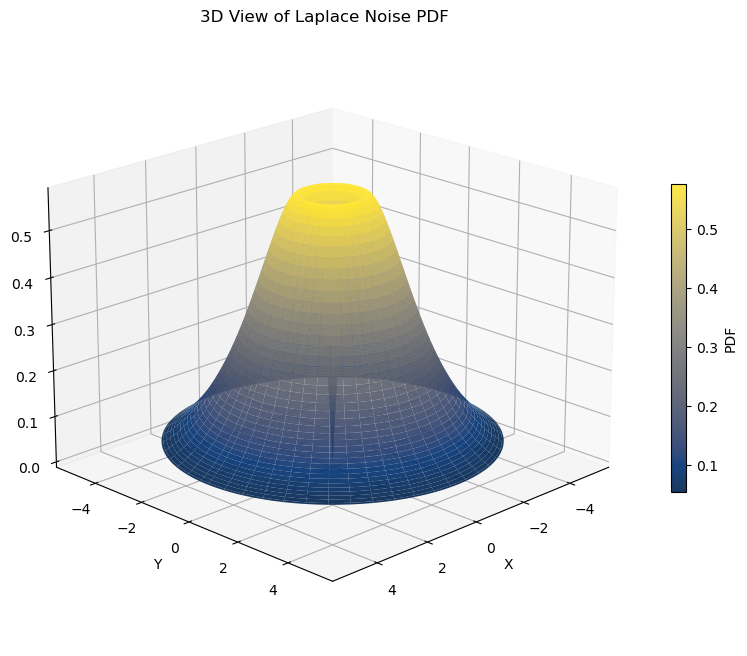

In [15]:
# Convert the polar coordinates to Cartesian for the 3D plot
X, Y = R * np.cos(Theta), R * np.sin(Theta)

# 3D plot in Cartesian coordinates
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(X, Y, Z, cmap='cividis', edgecolor='none', alpha=0.9, shade=True)
ax.view_init(elev=20, azim=45)

# Add a color bar which maps values to colors
cbar = fig.colorbar(surf, shrink=0.5, aspect=20)
cbar.set_label('PDF')

ax.set_title('3D View of Laplace Noise PDF')
ax.set_xlabel('X')
ax.set_ylabel('Y')
#ax.set_zlabel('PDF')

plt.show()


In [7]:
# cmap='cividis'
# cmap='coolwarm'

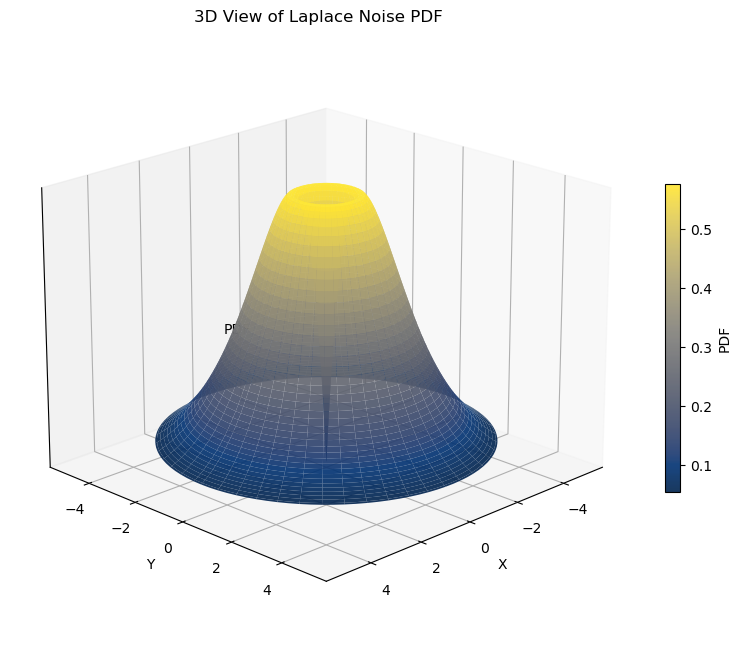

In [16]:
# Adjusting the plot to remove numbering on the z-axis

# 3D plot in Cartesian coordinates with specified modifications
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface plot with specified parameters
surf = ax.plot_surface(X, Y, Z, cmap='cividis', edgecolor='none', alpha=0.9, shade=True)
ax.view_init(elev=20, azim=45)

# Remove numbering (ticks) on the z-axis
ax.set_zticks([])

# Add a color bar which maps values to colors
cbar = fig.colorbar(surf, shrink=0.5, aspect=20)
cbar.set_label('PDF')

# Setting title and axes labels with z-axis label adjusted
ax.set_title('3D View of Laplace Noise PDF')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('PDF', labelpad=-100)  # Adjust label padding to avoid overlap if necessary

plt.show()


In [17]:
# Given function to generate Laplace noise samples in polar coordinates
def generate_laplace_noise_samples(epsilon, num_samples=1000):
    rs = []
    thetas = []
    for _ in range(num_samples):
        theta = np.random.uniform(0, 2 * np.pi)
        p = random.random()
        r = -1 / epsilon * (scipy.special.lambertw((p - 1) / np.e, k=-1, tol=1e-8).real + 1)
        rs.append(r)
        thetas.append(theta)
    return np.array(rs), np.array(thetas)

# Generate a large number of r, theta pairs
epsilon = 1.0
num_samples = 1000
rs, thetas = generate_laplace_noise_samples(epsilon, num_samples)

In [10]:
rs

array([1.79439221, 2.70076578, 2.20746745, 1.13005375, 1.51256903,
       2.66379329, 4.68941609, 3.00881486, 1.72757225, 0.15051466,
       1.10853558, 1.36291523, 0.54313493, 3.10524812, 0.73951693,
       1.74474582, 3.48600573, 1.46528857, 1.05614284, 1.48827023,
       0.99751969, 2.7066001 , 0.64134482, 4.08164554, 1.40461019,
       3.00435736, 1.95970513, 1.51186336, 1.52653406, 1.88095215,
       0.25685558, 0.47807878, 3.96050042, 0.75093749, 0.72284872,
       0.80636027, 2.36265325, 0.38808024, 2.80929634, 2.62671957,
       2.4098329 , 1.98000568, 3.04023559, 0.48614083, 3.58653042,
       2.16880797, 2.70503404, 0.30529726, 1.00436637, 0.57976919,
       1.0319809 , 1.14215604, 1.68162312, 3.82447524, 1.71480203,
       4.48892272, 2.30961104, 4.95094634, 0.2228575 , 1.34779664,
       1.25010561, 1.926092  , 8.03614513, 1.05072787, 1.86256965,
       0.73135767, 1.90039221, 2.02492607, 0.59802435, 1.24339725,
       1.4251939 , 3.0330832 , 0.47581591, 0.91024211, 3.90447

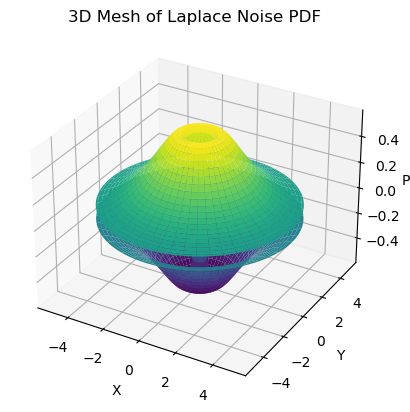

In [18]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import scipy.special

def laplace_noise_pdf(epsilon, r):
    """Compute the PDF of the Laplace noise based on the given radius and epsilon."""
    
    
    d = (epsilon**2/2*np.pi)*r*np.exp(-epsilon*np.abs(r))
    
    return d

# Set parameters for the plot
epsilon = 1.0
r = np.linspace(-5, 5, 100)
theta = np.linspace(0, 2 * np.pi, 100)

R, Theta = np.meshgrid(r, theta)
# Convert polar to cartesian coordinates for the PDF computation
X, Y = R * np.cos(Theta), R * np.sin(Theta)

# Compute the PDF
Z = laplace_noise_pdf(epsilon, R)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_title('3D Mesh of Laplace Noise PDF')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('PDF')

plt.show()
